In [59]:
def hama_response():
    #select a random response within 10-99
    filename = 'ave1/C1--HighPulse-in-100-out1700-an2100--000' + str(np.random.randint(10,99)) + '.txt'
    #print filename
    df = pd.read_table(filename, sep="\t", names={'I','II'},
                       dtype = {'I': np.float64, 'II': np.float64}, usecols = [1,0], skiprows=5) 
    time = df['I'].tolist()
    time = [ time[i]* 1.0e9 for i in range(len(time))]
    h = df['II'].tolist()
    return time,h

<IPython.core.display.Javascript object>


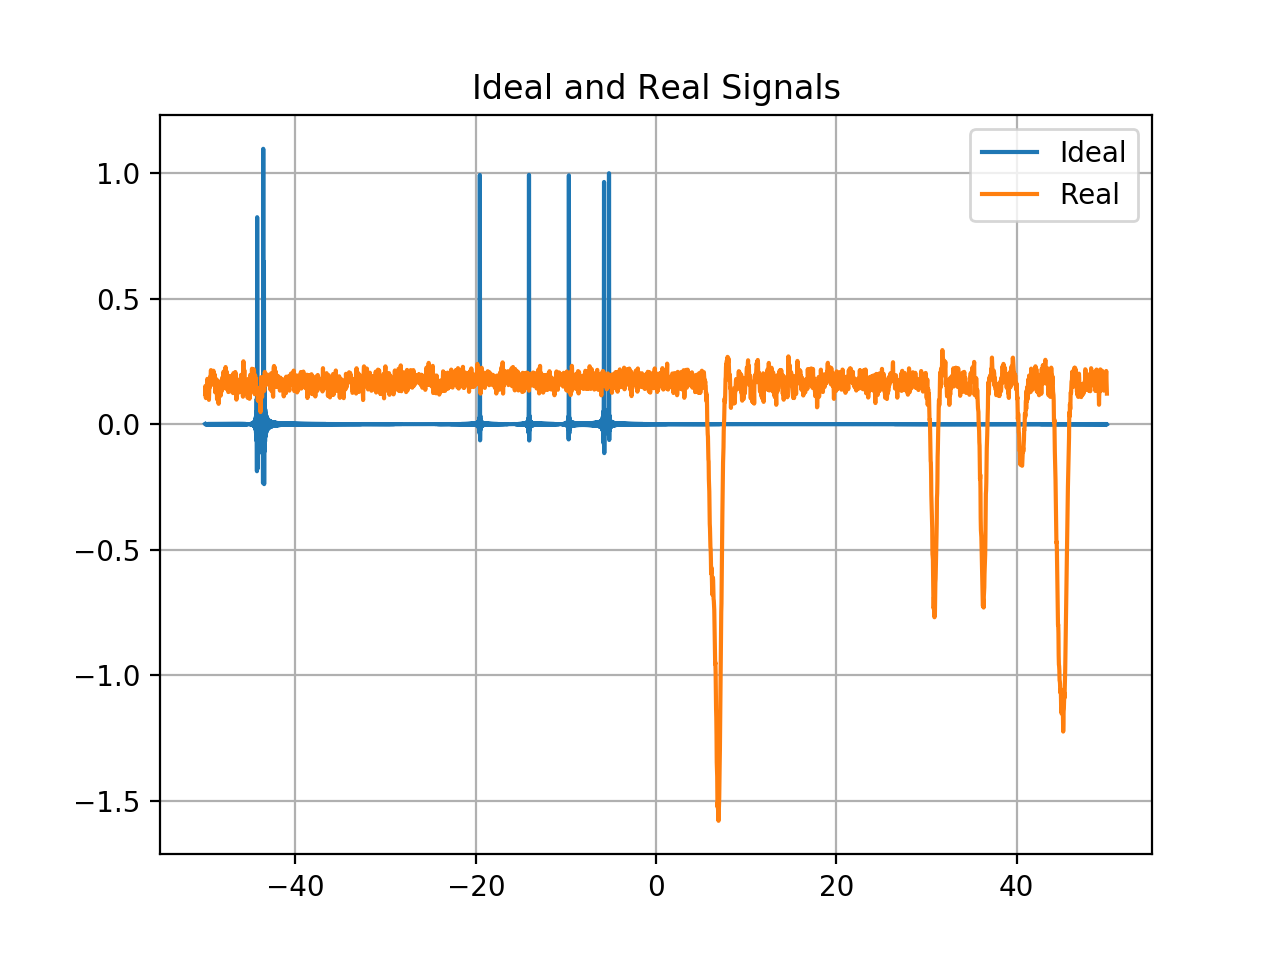

In [66]:
%matplotlib notebook

import numpy as np
from scipy.fftpack import fft, fftfreq, ifft
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt

"""
S--->G-->sig_r
     ^
     |
     |
h--->H
"""

#number of real random peaks
N = 8

#this operation is just to receive the timeframe to initialize
t, h = hama_response()
S = np.zeros(len(t), dtype=complex)
G = np.zeros(len(t), dtype=complex)
freq = fftfreq(len(h),d = t[1]-t[0])
H=[]
index=[]

#generating peaks with a random different Hamamatsu response
for i in range(N):
    time, h = hama_response()
    H.append(fft(h))
    index.append(np.random.randint(len(time)/2,len(time)))
    S += np.exp(-2*np.pi*1j*freq*time[index[i]])
    G += np.exp(-2*np.pi*1j*freq*time[index[i]])*H[i]

sig_i = np.real(ifft(S))
sig_r = np.real(ifft(G))

"""
#PSD calculation
psdg = np.abs(fft(sig_r)**2)

fig = plt.figure()
ax = fig.subplots()
ax.plot(fftfreq(len(h),d = t[1]-t[0]),20*np.log10(psdg),color='blue')
ax.set_title(label='PSD in dB')
ax.grid(True)
"""

fig = plt.figure()
ax = fig.subplots()
ax.plot(t,sig_i,label='Ideal')
ax.plot(t,sig_r,label='Real')
ax.set_title(label='Ideal and Real Signals')
ax.grid(True)
ax.legend()

In [65]:
len(index)

8